### 참고 사이트

+ http://matplotlib.org
+ http://seaborn.pydata.org

### 기본 그래프

선(line), 막대(bar), 히스토그램(histogram), 산포도(scatterplot), 상자(boxplot)

#### 1) 질적 데이터
    - 요약 방법 : 도표
    - 정리 방법 : 도수 분포표, 분할표
    - 그래프 : 막대 그래프, 원 그래프, ...

#### 2) 양적 데이터
    - 요약 방법 : 수치
    - 정리 방법 : 산술평균, 중앙값, ...
    - 그래프 : 히스토그램, Boxplot, 시계열(선) 그래프, 산포도(산점도)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() #한글이 깨지지않고 나오도록
plt.rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

### 선 그래프

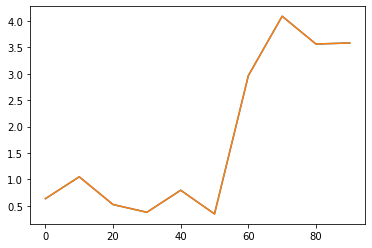

In [8]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10)) #cumsum : 누적
s
s.plot()
s.plot.line()

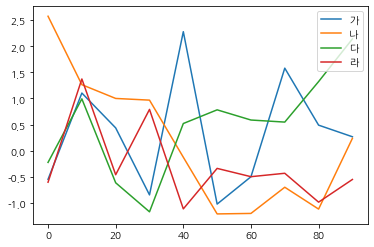

In [20]:
df1 = pd.DataFrame(np.random.randn(10,4), columns=['가','나','다','라'],
            index=np.arange(0,100,10))
df1
df1.plot()

### 막대그래프

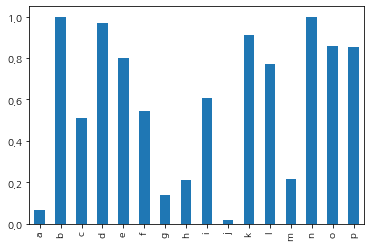

In [24]:
s2 = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
s2
s2.plot(kind='bar')
s2.plot.bar()

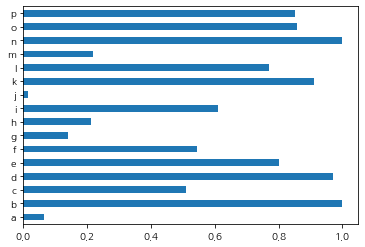

In [26]:
s2.plot(kind='barh') #수평막대그래프
s2.plot.barh()

In [30]:
df2 = pd.DataFrame(np.random.rand(6,4),
                  index = ['one','two','three','four','five','six'],
                  columns=pd.Index(['A','B','C','D'], name='Genus'))
df2

Genus,A,B,C,D
one,0.701020,0.147364,0.243335,0.772592
two,0.309293,0.483820,0.914063,0.023140
three,0.865193,0.190559,0.782986,0.799827
four,0.340359,0.485782,0.645000,0.084051
five,0.729528,0.086163,0.286063,0.205180
six,0.992597,0.011471,0.194617,0.490449


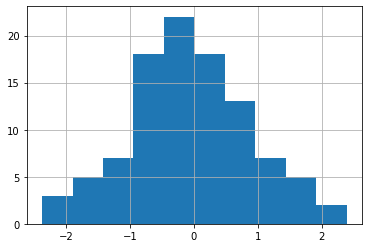

In [2]:
s = pd.Series(np.random.normal(0,1,size=100))
s
s.hist()

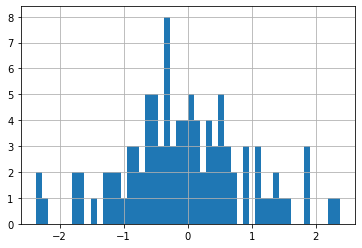

In [3]:
s.hist(bins=50)

### 산포도(Scatter plot)
+ 두 변수의 관계를 확인 : 양, 음

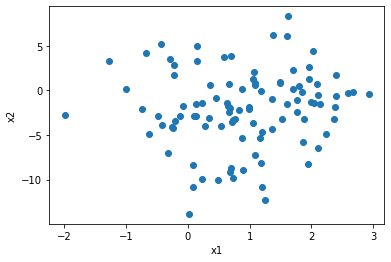

In [9]:
x1 = np.random.normal(1,1,size=(100,1))
x1

x2 = np.random.normal(-2,4,size=(100,1))
x2

x = np.concatenate((x1,x2),axis=1)
x[:5]

df=pd.DataFrame(x,columns=["x1","x2"])
df.head()

df.plot.scatter("x1","x2")
plt.scatter(df["x1"],df["x2"])

## 상자 그래프

---
## matplotlib를 이용한 그래프 그리기

In [11]:
# 데이터 준비
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0, 0.5, 'Total Bill')

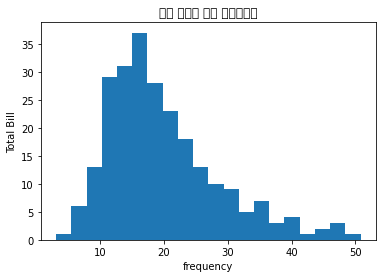

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# total_bill에 대한 금액 분포를 확인
ax.hist(tips["total_bill"],bins=20)
ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

Text(0, 0.5, 'Tip')

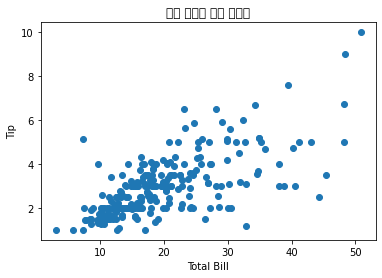

In [17]:
# Tip과 Total_bill의 관계를 알고 싶다.
fig = plt.figure()
ax = fig.add_subplot(1,1,1)


ax.scatter(tips["total_bill"],tips["tip"])
ax.set_title("식사 대금에 대한 산포도")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

Text(0, 0.5, 'Tip')

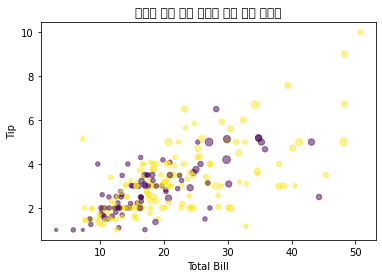

In [23]:
# 성별에 따른 Tip과 Total_bill의 관계를 알고 싶다.

def record_sex(sex):
    if sex=="Female":
        return 0 
    else:
        return 1
    
tips["sex_color"] = tips["sex"].apply(record_sex)
tips.head()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)


ax.scatter(tips["total_bill"],tips["tip"], c=tips["sex_color"],
          s=tips["size"]*10, alpha=0.5)
ax.set_title("성별과 인원수에 따른 식사 대금과 팁에 대한 산포도")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")


Text(0.5, 1.0, '성별에 따른 팁에 대한 box plot')

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54017 missing from current

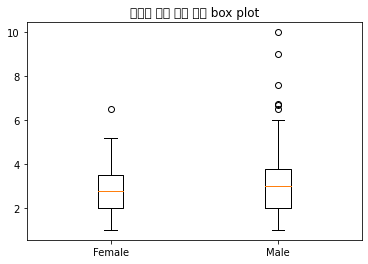

In [27]:
# 성별과 tip의 관계

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.boxplot([tips[tips["sex"]=="Female"]["tip"], tips[tips["sex"]=="Male"]["tip"]],
          labels=["Female","Male"])
ax.set_title("성별에 따른 팁에 대한 box plot")

NameError: name 'tips' is not defined

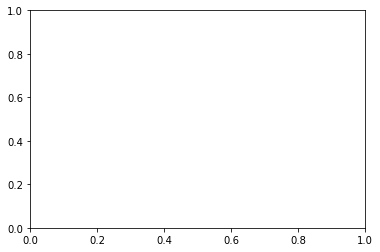

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.boxplot([tips[tips['sex']=='Female']['tip'], tips[tips['sex']=='Male']['tip']],
          labels = ['Female','Male'])
ax.set_title('Boxplot of Tips by Sex')
ax.set_xlabel('Sex')
ax.set_ylabel('Tip')

##  seaborn

In [28]:
tips = sns.load_dataset("tips")


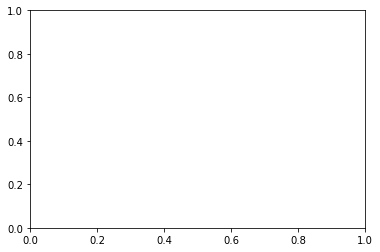

In [29]:
ax = plt.subplot(1,1,1)

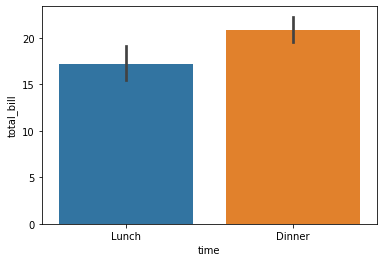

In [30]:
sns.barplot(x="time",y="total_bill",data=tips)

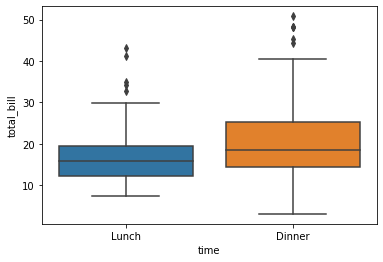

In [31]:
sns.boxplot(x="time",y="total_bill",data=tips)

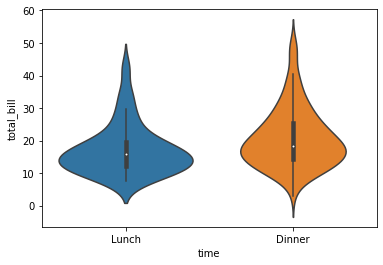

In [32]:
sns.violinplot(x="time",y="total_bill",data=tips)

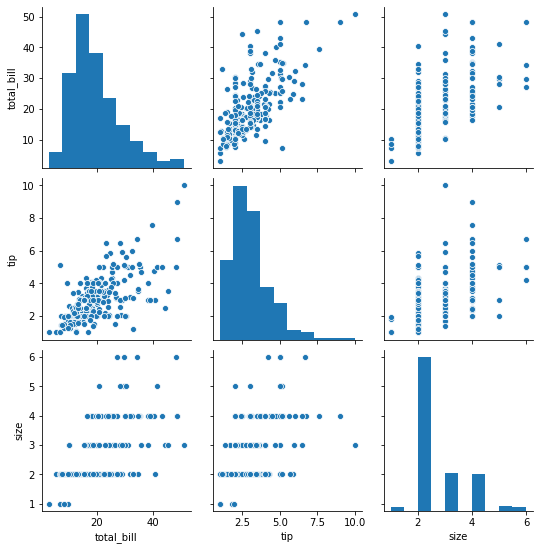

In [33]:
sns.pairplot(tips)

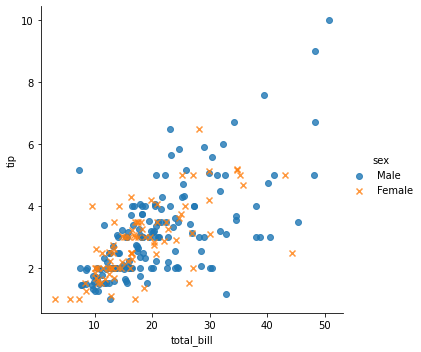

In [38]:
# 성별로 전체 식사대금과 팁의 관계를 확인
sns.lmplot(x="total_bill",y="tip",data=tips, fit_reg=False, hue="sex",markers=["o","x"])

In [41]:
state_unemp = pd.read_csv("C:/Users/user/Documents/jun/analysis/map/folium_US_Unemployment_Oct2012.csv")
state_unemp.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [56]:
import folium
state_geo = "C:/Users/user/Documents/jun/analysis/map/folium_us-states.json"

map = folium.Map(location=[40,-98], zoom_start=4)
map.choropleth(geo_data=state_geo,data=state_unemp, key_on="feature.id",columns=["State","Unemployment"],fill_colors="YLGn")
map

In [66]:
# Maker
map = folium.Map(location=[37.501826, 127.039780], zoom_start=15)
map


#folium.Marker(location=[37.50182,127.039780], popup="역삼역 근처",icon=folium.Icon(color="red",icon="star"))

# marker.add_to(map)
folium.Marker(location=[37.50182,127.039780], popup="역삼역 근처",icon=folium.Icon(color="red",icon="star")).add_to(map)


map

folium.CircleMarker(location=[37.50182,127.039780], popup="역삼역 근처",radius=50,color="#ffffgg",fil_color="#fffggg").add_to(map)

map

# map.save("C:/Users/user/Documents/jun/analysis/map/map.html")

### WordCloud
- pip install wordcloud

In [9]:
from wordcloud import WordCloud, STOPWORDS

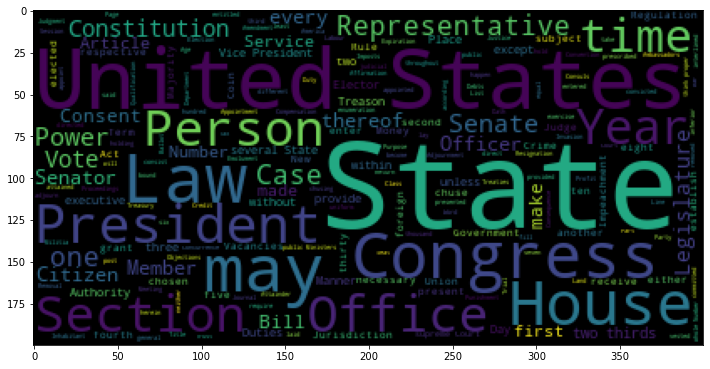

In [85]:
text = open("C:/Users/user/Documents/jun/analysis/data/wordcloud/constitution.txt")
text = text.read()
text

wordcloud=WordCloud().generate(text)
dir(wordcloud)
wordcloud.words_

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)

(-0.5, 399.5, 199.5, -0.5)

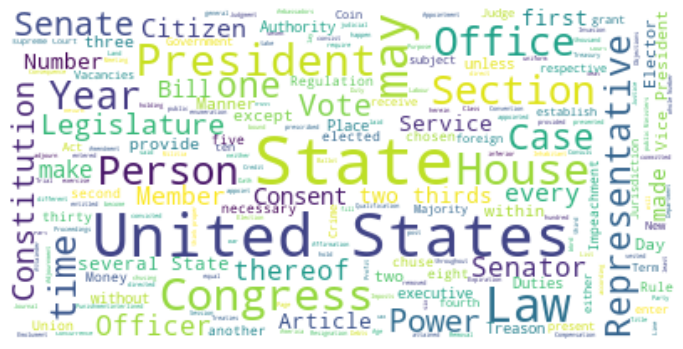

In [75]:
wordcloud = WordCloud(max_font_size=40, background_color="white").generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

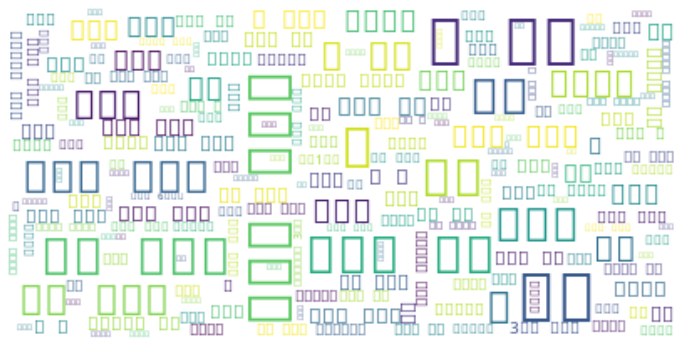

In [12]:
wordcloud = WordCloud(max_font_size=40, background_color="white").generate(constitution)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")

In [18]:
import nltk
from konlpy.corpus import kolaw
from konlpy.tag import Twitter


In [24]:
ko_text = kolaw.open("constitution.txt").read()
ko_text

# 불용어 처리
stop_words = ['제','월','일','조','수','때','그','이','바','및','안','정','위','관']

# 형태소 분석
t = Okt()
ko_token = t.nouns(ko_text)
ko_token = [each_word for each_word in token_ko if each_word not in stop_words]

# 워드 카운팅
ko = nltk.Text(token_ko, name = '대한민국 헌법')
data = ko.vocab().most_common(50)

wordcloud = WordCloud(background_color='white',
                     font_path='C:/Windows/Fonts/malgun.ttf').generate_from_frequencies(dict(data))

plt.figure(figsize = (12,12))
plt.imshow(wrdcloud, interpolation='bilinear')
plt.axit('off')

NameError: name 'okt' is not defined

In [7]:
constitution = kolaw.open('./constitution.txt').read()
print(constitution)

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.
  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.
  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.
②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.
  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.
②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.
  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.
②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.
  제8조 ① 정당의 설립은 자유이며, 복수정당제

In [3]:
# 워드 카운팅


ko = nltk.Text(token_ko, name = '대한민국 헌법')
data = ko.vocab().most_common(50)

wordcloud = WordCloud(background_color='white',
                      mask=alice_mask,
                     font_path='C:/Windows/Fonts/malgun.ttf').generate_from_frequencies(dict(data))

plt.figure(figsize = (12,12))
plt.imshow(wrdcloud, interpolation='bilinear')
plt.axit('off')

NameError: name 'token_ko' is not defined

In [92]:
from PIL import Image

alice_mask = np.array(Image.open("C:/Users/user/Documents/jun/analysis/data/wordcloud/alice_mask.png"))
alice_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

(-0.5, 639.5, 479.5, -0.5)

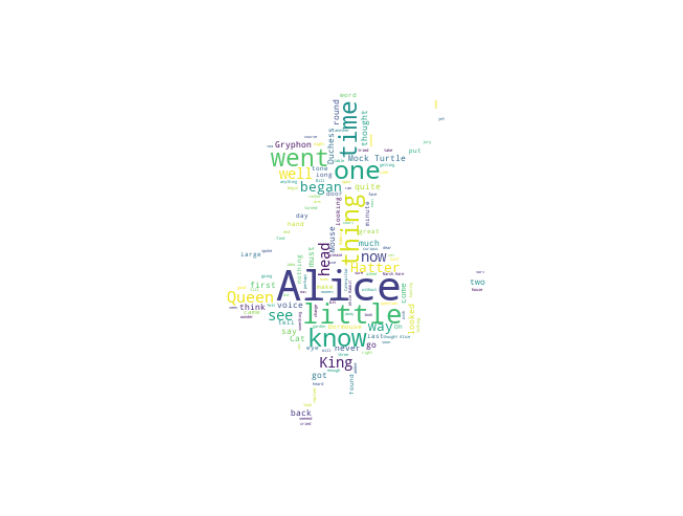

In [93]:
text = open("C:/Users/user/Documents/jun/analysis/data/wordcloud/alice.txt").read()
text
stopwords = set(STOPWORDS)
stopwords.add("said")

wordcloud = WordCloud(max_font_size=40, background_color="white",
                      mask=alice_mask, stopwords=stopwords, 
                      max_words=500).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")

In [91]:
alice_color = np.array(Ima)

NameError: name 'alice_' is not defined

In [ ]:
wordcloud = WordCloud(max_font_size=40, background_color="white",
                      mask=alice_mask, stopwords=stopwords, 
                      max_words=500).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")

In [97]:
# http://konlpy.org
#! pip install konlpy


  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.1
    Uninstalling beautifulsoup4-4.9.1:
      Successfully uninstalled beautifulsoup4-4.9.1


In [99]:
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk

In [1]:
from konlpy.tag import Okt
from konlpy.corpus import kolaw

ko_text = kolaw.open("constitution.txt").read()
stop_words = ["제", "월", "일", "조", "수", "때", "그", "이", "바", "및", "안", "정", "위", "관"]

t = Okt()
ko_token = t.nouns(ko_text)
ko_token = [each_word for each_word in ko_token if each_word not in stop_words]


JVMNotFoundException: No JVM shared library file (jvm.dll) found. Try setting up the JAVA_HOME environment variable properly.